# Credit Card Fraud Detection

Anonymized credit card transactions labeled as fraudulent or genuine

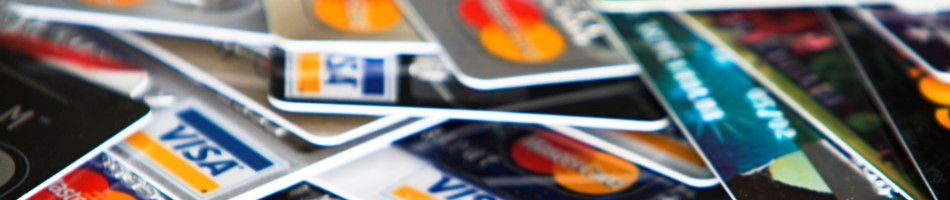

## About Dataset

- The dataset contains transactions made by credit cards in September 2013 by European cardholders.

- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. [More Details Here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

https://learn.microsoft.com/en-us/dotnet/machine-learning/how-does-mldotnet-work

##  Import and reference specific NuGet packages

* **Microsoft.ML**: Main package for Microsoft Machine Learning.
* **Microsoft.ML.ImageAnalytics**: Package focused on working with image data in machine learning scenarios.
* **Microsoft.ML.TensorFlow**: This package enables the usage of TensorFlow models
* **Microsoft.ML.OnnxTransformer**: This package adds support for ONNX (Open Neural Network Exchange) models.
* **Microsoft.ML.LightGbm**: Provides a LightGBM (Light Gradient Boosting Machine), a gradient boosting framework that is known for its efficiency and scalability.

In [1]:
#r "nuget:Microsoft.ML"
#r "nuget:Microsoft.Data.Analysis"
#r "nuget:Microsoft.ML.ImageAnalytics"
#r "nuget:Microsoft.ML.TensorFlow"
#r "nuget:Microsoft.ML.OnnxTransformer"
#r "nuget:Microsoft.ML.LightGbm"

Installed Packages Microsoft.Data.Analysis, 0.20.1 Microsoft.ML, 2.0.1 Microsoft.ML.ImageAnalytics, 2.0.1 Microsoft.ML.LightGbm, 2.0.1 Microsoft.ML.OnnxTransformer, 2.0.1 Microsoft.ML.TensorFlow, 2.0.1

Loading extensions from `C:\Users\marcu\.nuget\packages\skiasharp\2.88.3\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

Loading extensions from `C:\Users\marcu\.nuget\packages\microsoft.data.analysis\0.20.1\interactive-extensions\dotnet\Microsoft.Data.Analysis.Interactive.dll`

## Import Namespaces

* **System**: Provides fundamental types and base classes that are commonly used across various programming tasks.

* **System.IO**: Provides types for working with input/output operations, such as reading from and writing to files.

* **System.Reflection**: Contains types and classes that provide programmatic access to metadata and information about the loaded assemblies, types, and members.

* **Microsoft.ML**: Used for machine learning tasks in .NET applications.

* **Microsoft.ML.Data**: Contains types and classes for defining and manipulating data used in ML.NET pipelines.

* **Microsoft.ML.Transforms**: Provides types and classes for data transformation operations in ML.NET pipelines.

* **Microsoft.ML.Trainers.LightGbm**: Contains types and classes related to the LightGBM (Gradient Boosting Machine) trainer in ML.NET, which is an efficient machine learning algorithm for classification and regression tasks.

* **Microsoft.Data.Analysis**: Provides a tabular data structure and data manipulation capabilities similar to pandas in Python.

In [2]:
using System;
using System.IO;
using System.Reflection;
using Microsoft.ML;
using Microsoft.ML.Data;
using Microsoft.ML.Transforms;
using Microsoft.ML.Trainers.LightGbm;
using Microsoft.Data.Analysis;

## Define constant path variables for models

* **creditcard.csv**: Represents the csv file with the dataset.
* **model.zip**: Represents the zip file of the ML.Net model that will be created

In [3]:
private static readonly string assetsPath     = Directory.GetCurrentDirectory();
private static readonly string DATA_FILEPATH  = Path.Combine(assetsPath, "creditcard.csv");
private static readonly string MODEL_FILEPATH = Path.Combine(assetsPath, "model.zip");

## Class with all features and label used as model inputs

- It contains only numerical input variables which are the result of a PCA transformation.

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
private sealed class ModelInput
{
    [ColumnName("Time"), LoadColumn(0)]
    public float Time    { get; set; }

    [ColumnName("V1"), LoadColumn(1)]
    public float V1      { get; set; }

    [ColumnName("V2"), LoadColumn(2)]
    public float V2      { get; set; }

    [ColumnName("V3"), LoadColumn(3)]
    public float V3      { get; set; }

    [ColumnName("V4"), LoadColumn(4)]
    public float V4      { get; set; }

    [ColumnName("V5"), LoadColumn(5)]
    public float V5      { get; set; }

    [ColumnName("V6"), LoadColumn(6)]
    public float V6      { get; set; }

    [ColumnName("V7"), LoadColumn(7)]
    public float V7      { get; set; }

    [ColumnName("V8"), LoadColumn(8)]
    public float V8      { get; set; }

    [ColumnName("V9"), LoadColumn(9)]
    public float V9      { get; set; }

    [ColumnName("V10"), LoadColumn(10)]
    public float V10     { get; set; }

    [ColumnName("V11"), LoadColumn(11)]
    public float V11     { get; set; }

    [ColumnName("V12"), LoadColumn(12)]
    public float V12     { get; set; }

    [ColumnName("V13"), LoadColumn(13)]
    public float V13     { get; set; }

    [ColumnName("V14"), LoadColumn(14)]
    public float V14     { get; set; }

    [ColumnName("V15"), LoadColumn(15)]
    public float V15     { get; set; }

    [ColumnName("V16"), LoadColumn(16)]
    public float V16     { get; set; }

    [ColumnName("V17"), LoadColumn(17)]
    public float V17     { get; set; }

    [ColumnName("V18"), LoadColumn(18)]
    public float V18     { get; set; }

    [ColumnName("V19"), LoadColumn(19)]
    public float V19     { get; set; }

    [ColumnName("V20"), LoadColumn(20)]
    public float V20     { get; set; }

    [ColumnName("V21"), LoadColumn(21)]
    public float V21     { get; set; }

    [ColumnName("V22"), LoadColumn(22)]
    public float V22     { get; set; }

    [ColumnName("V23"), LoadColumn(23)]
    public float V23     { get; set; }

    [ColumnName("V24"), LoadColumn(24)]
    public float V24     { get; set; }

    [ColumnName("V25"), LoadColumn(25)]
    public float V25     { get; set; }

    [ColumnName("V26"), LoadColumn(26)]
    public float V26     { get; set; }

    [ColumnName("V27"), LoadColumn(27)]
    public float V27     { get; set; }

    [ColumnName("V28"), LoadColumn(28)]
    public float V28     { get; set; }

    [ColumnName("Amount"), LoadColumn(29)]
    public float Amount  { get; set; }

    [ColumnName("Class"), LoadColumn(30)]
    public bool  Class   { get; set; }
}

## Output resut Class

The output of the model is the predicted result of the 'Class' attribute and the score of this prediction.

In [5]:
private sealed class ModelOutput
{
    [ColumnName("PredictedLabel")]
    public bool  Prediction { get; set; }

    public float Score      { get; set; }
}

## Code workflow

* Collect and load training data into an IDataView object

* Specify a pipeline of operations to extract features and apply a machine learning algorithm

* Train a model by calling Fit() on the pipeline

* Evaluate the model and iterate to improve

* Save the model into binary format, for use in an application

* Load the model back into an ITransformer object

* Make predictions by calling CreatePredictionEngine.Predict()

[More details here](https://learn.microsoft.com/en-us/dotnet/machine-learning/how-does-mldotnet-work)

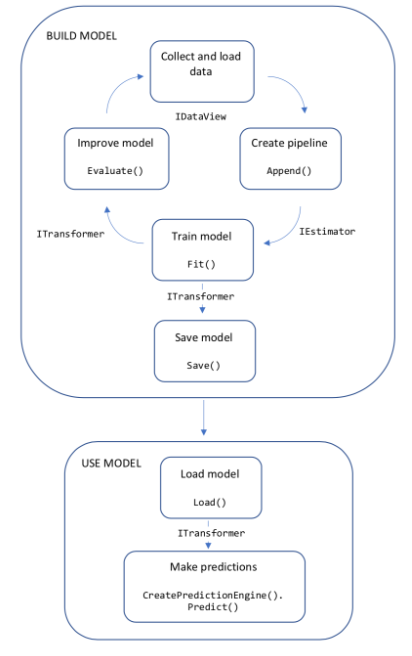

## Load csv model input data in memory

Define the settings for loading data from the file into memory.

In [6]:
/// <summary>
/// This method loads the training data from a text file and returns it as an IDataView.
/// </summary>
private static IDataView LoadTrainingData(MLContext mlContext)
{
    // Load Data
    IDataView trainingDataView = mlContext.Data.LoadFromTextFile<ModelInput>(
                                            path: DATA_FILEPATH,
                                            hasHeader: true,
                                            separatorChar: ',',
                                            allowQuoting: true,
                                            allowSparse: false);

    return trainingDataView;
}

Define context and loads data for model creation.

In [7]:
MLContext mlContext        = new MLContext(seed: 1);
IDataView trainingDataView = LoadTrainingData(mlContext);
DataFrame dataFrame        = trainingDataView.ToDataFrame();
dataFrame.Head(10)

index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.3598071,-0.072781175,2.5363467,1.3781552,-0.33832076,0.46238777,0.23959856,0.0986979,0.36378697,0.09079417,-0.55159956,-0.61780083,-0.9913899,-0.31116936,1.468177,-0.4704005,0.20797125,0.02579058,0.40399295,0.2514121,-0.018306779,0.27783757,-0.11047391,0.066928074,0.12853935,-0.18911484,0.13355838,-0.021053053,149.62,False
1,0,1.1918571,0.2661507,0.16648011,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510166,-0.25542513,-0.16697441,1.6127267,1.0652353,0.489095,-0.14377229,0.63555807,0.46391705,-0.11480466,-0.18336128,-0.14578304,-0.06908313,-0.22577524,-0.63867193,0.10128802,-0.33984646,0.1671704,0.12589453,-0.008983099,0.014724169,2.69,False
2,1,-1.3583541,-1.3401631,1.7732093,0.3797796,-0.50319815,1.8004994,0.79146093,0.24767579,-1.5146543,0.20764287,0.62450147,0.066083685,0.7172927,-0.16594592,2.345865,-2.8900833,1.1099694,-0.12135931,-2.261857,0.5249797,0.24799815,0.7716794,0.90941226,-0.6892809,-0.32764184,-0.13909657,-0.055352796,-0.059751842,378.66,False
3,1,-0.9662717,-0.18522601,1.7929933,-0.86329126,-0.010308879,1.2472031,0.23760894,0.37743586,-1.387024,-0.05495192,-0.22648726,0.17822823,0.5077569,-0.28792375,-0.6314181,-1.0596472,-0.68409276,1.965775,-1.232622,-0.20803778,-0.108300455,0.005273597,-0.19032052,-1.1755754,0.64737606,-0.22192885,0.06272285,0.06145763,123.5,False
4,2,-1.158233,0.87773675,1.5487179,0.40303394,-0.40719336,0.095921464,0.59294075,-0.27053267,0.8177393,0.7530744,-0.8228429,0.53819555,1.3458515,-1.1196698,0.17512113,-0.4514492,-0.23703323,-0.038194787,0.80348694,0.40854236,-0.009430697,0.7982785,-0.13745809,0.14126699,-0.20600958,0.5022922,0.21942224,0.21515314,69.99,False
5,2,-0.42596588,0.96052307,1.1411093,-0.16825208,0.4209869,-0.029727552,0.47620094,0.26031435,-0.5686714,-0.3714072,1.341262,0.35989383,-0.35809064,-0.1371337,0.5176168,0.4017259,-0.058132824,0.06865315,-0.03319379,0.08496767,-0.20825352,-0.5598248,-0.026397668,-0.37142658,-0.23279382,0.10591478,0.25384423,0.08108026,3.67,False
6,4,1.2296576,0.1410035,0.045370772,1.2026128,0.19188099,0.27270812,-0.0051590027,0.08121294,0.46496,-0.09925432,-1.4169072,-0.15382582,-0.7510627,0.16737196,0.050143596,-0.4435868,0.0028205125,-0.61198735,-0.045575045,-0.21963255,-0.16771626,-0.27070972,-0.15410379,-0.7800554,0.7501369,-0.25723684,0.03450743,0.005167769,4.99,False
7,7,-0.64426947,1.4179635,1.0743804,-0.492199,0.9489341,0.42811847,1.1206313,-3.8078642,0.61537474,1.2493762,-0.6194678,0.29147434,1.7579643,-1.3238652,0.6861325,-0.076127,-1.2221273,-0.35822156,0.32450473,-0.15674186,1.9434654,-1.0154548,0.05750353,-0.649709,-0.41526657,-0.051634297,-1.2069211,-1.0853392,40.8,False
8,7,-0.8942861,0.2861572,-0.113192216,-0.27152613,2.6695986,3.721818,0.37014514,0.8510845,-0.39204758,-0.41043043,-0.70511657,-0.110452265,-0.28625363,0.074355364,-0.32878307,-0.21007727,-0.49976796,0.11876486,0.5703282,0.052735668,-0.0734251,-0.26809162,-0.20423266,1.0115918,0.37320468,-0.3841573,0.0117473565,0.14240433,93.2,False
9,9,-0.33826175,1.1195934,1.0443666,-0.22218728,0.4993608,-0.2467611,0.6515832,0.069538586,-0.7367273,-0.36684564,1.0176145,0.83638954,1.0068436,-0.4435228,0.1502191,0.7394528,-0.5409799,0.47667727,0.45177296,0.20371145,-0.24691394,-0.63375264,-0.12079409,-0.38504994,-0.069733046,0.09419883,0.2462193,0.08307565,3.68,False


## Build Training Pipeline

Extract the names of the features that will be used to train the model.

In [8]:
/// <summary>
/// This method extracts the names of input features from the 
/// ModelInput class and returns them as an array of strings.
/// </summary>
public static string[] ExtractModelInputFeaturesNames()
{
    string[] featuresNames = typeof(ModelInput)
                                .GetProperties(BindingFlags.Instance | BindingFlags.Public)
                                .Select(p => p.Name)
                                .Where(p => p != "Class") // Removes target variable
                                .ToArray();

    return featuresNames;
}

Create a pipeline for the model, separating the features from the target.

In [9]:
/// <summary>
/// This method constructs a training pipeline for binary 
/// classification using the LightGBM algorithm in ML.NET.
/// </summary>
private static IEstimator<ITransformer> BuildTrainingPipeline(MLContext mlContext)
{
    // Extract all features properties names
    string[]                     featuresNames       = ExtractModelInputFeaturesNames();

    // Data process configuration with pipeline data transformations 
    ColumnConcatenatingEstimator dataProcessPipeline = mlContext.Transforms.Concatenate("Features", featuresNames);

    // Set the training algorithm 
    LightGbmBinaryTrainer        trainer             = mlContext.BinaryClassification.Trainers.LightGbm(labelColumnName: "Class", 
                                                                                                        featureColumnName: "Features");
                                                                   
    IEstimator<ITransformer>     trainingPipeline    = dataProcessPipeline.Append(trainer);

    return trainingPipeline;
}

## Train Model

Perform model training based on the created pipeline.

In [10]:
/// <summary>
/// This method trains a machine learning model using the provided training data and training pipeline.
/// </summary>
private static ITransformer TrainModel(MLContext mlContext, IDataView trainingDataView, IEstimator<ITransformer> trainingPipeline)
{
    Console.WriteLine("=============== Training  model ===============");
    ITransformer model = trainingPipeline.Fit(trainingDataView);
    Console.WriteLine("=============== End of training process ===============");
    
    return model;
}

## Evaluate the metrics generated from the model

Create a method to calculate the standard deviation for accuracy metrics.

In [11]:
/// <summary>
/// This method calculates the standard deviation of a collection of double values.
/// </summary>
private static double CalculateStandardDeviation(IEnumerable<double> values)
{
    double average                   = values.Average();
    double sumOfSquaresOfDifferences = values.Select(val => (val - average) * (val - average)).Sum();
    double standardDeviation         = Math.Sqrt(sumOfSquaresOfDifferences / (values.Count() - 1));
    return standardDeviation;
}

Create a method to calculate the 95% confidence interval for accuracy metrics.

In [12]:
/// <summary>
/// This method calculates the 95% confidence interval for a collection of double values.
/// </summary>
private static double CalculateConfidenceInterval95(IEnumerable<double> values)
{
    double confidenceInterval95 = 1.96 * CalculateStandardDeviation(values) / Math.Sqrt((values.Count() - 1));
    return confidenceInterval95;
}

Display the averages of the metrics after the model has been subjected to a K-Folds classification.

In [13]:
/// <summary>
/// This method prints the average metrics for binary classification 
/// obtained from cross-validation results.
/// </summary>
private static void PrintBinaryClassificationFoldsAverageMetrics(IEnumerable<TrainCatalogBase.CrossValidationResult<BinaryClassificationMetrics>> crossValResults)
{
    var metricsInMultipleFolds         = crossValResults.Select(r => r.Metrics);
    var AccuracyValues                 = metricsInMultipleFolds.Select(m => m.Accuracy);
    var AccuracyAverage                = AccuracyValues.Average();
    var AccuraciesStdDeviation         = CalculateStandardDeviation(AccuracyValues);
    var AccuraciesConfidenceInterval95 = CalculateConfidenceInterval95(AccuracyValues);


    Console.WriteLine($"*************************************************************************************************************");
    Console.WriteLine($"*       Metrics for Binary Classification model      ");
    Console.WriteLine($"*------------------------------------------------------------------------------------------------------------");
    Console.WriteLine($"*       Average Accuracy:    {AccuracyAverage:0.###}  - Standard deviation: ({AccuraciesStdDeviation:#.###})  - Confidence Interval 95%: ({AccuraciesConfidenceInterval95:#.###})");
    Console.WriteLine($"*************************************************************************************************************");
}

Generate cross-validation metrics to evaluate model efficiency.

In [14]:
/// <summary>
/// This method performs cross-validation to evaluate the accuracy 
/// metrics of a binary classification model.
/// </summary>
private static void Evaluate(MLContext mlContext, IDataView trainingDataView, IEstimator<ITransformer> trainingPipeline)
{
    Console.WriteLine("=============== Cross-validating to get model's accuracy metrics ===============");
    var crossValidationResults = mlContext.BinaryClassification.CrossValidateNonCalibrated(trainingDataView, 
                                                                                           trainingPipeline, 
                                                                                           numberOfFolds: 5, 
                                                                                           labelColumnName: "Class");
    PrintBinaryClassificationFoldsAverageMetrics(crossValidationResults);
}

## Save fit model

Save the created model in the given path.

In [15]:
/// <summary>
/// This method saves a trained machine learning model to a file.
/// </summary>
private static void SaveModel(MLContext mlContext, ITransformer mlModel, DataViewSchema modelInputSchema)
{
    Console.WriteLine($"=============== Saving the model  ===============");
    mlContext.Model.Save(mlModel, modelInputSchema, MODEL_FILEPATH);
    Console.WriteLine($"The model is saved to {MODEL_FILEPATH}");
}

## Generate Model using all previously created methods

Organize all the steps created to generate the model

In [16]:
/// <summary>
/// This method creates and saves a machine learning model using the provided training data.
/// </summary>
private static void GenerateModel(MLContext mlContext, IDataView trainingDataView)
{                 
    // Build training pipeline
    IEstimator<ITransformer> trainingPipeline = BuildTrainingPipeline(mlContext);

    // Evaluate quality of Model
    Evaluate(mlContext, trainingDataView, trainingPipeline);

    // Train Model
    ITransformer mlModel = TrainModel(mlContext, trainingDataView, trainingPipeline);

    // Save model
    SaveModel(mlContext, mlModel, trainingDataView.Schema);
}

Run all steps and generate the model.

In [17]:
GenerateModel(mlContext, trainingDataView);

=============== Cross-validating to get model's accuracy metrics ===============
*************************************************************************************************************
*       Metrics for Binary Classification model      
*------------------------------------------------------------------------------------------------------------
*       Average Accuracy:    0,999  - Standard deviation: ()  - Confidence Interval 95%: ()
*************************************************************************************************************
=============== Training  model ===============
=============== End of training process ===============
=============== Saving the model  ===============
The model is saved to d:\Notebooks\model.zip


## Predict data with created model

Extract a sample example to test the model.

In [18]:
/// <summary>
/// This method creates a single data sample for prediction from the loaded training data.
/// </summary>
private static ModelInput CreateSingleDataSample(MLContext mlContext, int index)
{       
    IDataView  dataView            = LoadTrainingData(mlContext);
    ModelInput sampleForPrediction = mlContext.Data.CreateEnumerable<ModelInput>(dataView, false).ElementAt(index);
                                                                        
    return sampleForPrediction;
}

Check the generated result

In [19]:
ITransformer                              mlModel    = mlContext.Model.Load(MODEL_FILEPATH, out DataViewSchema inputSchema);
PredictionEngine<ModelInput, ModelOutput> predEngine = mlContext.Model.CreatePredictionEngine<ModelInput, ModelOutput>(mlModel);

// Get single data-point
ModelInput  sampleData       = CreateSingleDataSample(mlContext, 0);
ModelOutput predictionResult = predEngine.Predict(sampleData);

Console.WriteLine($"Actual value: {sampleData.Class} | Predicted value: {predictionResult.Prediction}");

Actual value: False | Predicted value: False
